In [34]:
import re
from pathlib import Path

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options as ChromeOptions

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from webdriver_manager.chrome import ChromeDriverManager
from sys import platform

import time
from bs4 import BeautifulSoup
import requests

In [35]:

chromium_driver_path = Path("/usr/bin/chromedriver")

options = ChromeOptions()
options.add_argument(
    "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.5615.49 Safari/537.36"
)

if platform == "linux" or platform == "linux2":
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--remote-debugging-port=9222")

options.add_argument("--no-sandbox")
chromium_driver_path = Path("/usr/bin/chromedriver")

driver = webdriver.Chrome(
    executable_path=chromium_driver_path
    if chromium_driver_path.exists()
    else ChromeDriverManager().install(),
    options=options,
)

print('success to load driver')

/tmp/ipykernel_1549/1499340196.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(


success to load driver


In [36]:

driver.get("https://map.naver.com/v5/search")


In [38]:
# time.sleep(1)
search_box = driver.find_element_by_css_selector("div.input_box>input.input_search")
# search_box.send_keys("강원도 파도살롱")
search_box.send_keys("맛집")

driver.implicitly_wait(1)
# wait.until(EC.element_to_be_clickable((By.NAME, "찾으려는 요소의 name값")))

# 검색버튼 누르기
search_box.send_keys(Keys.ENTER)

/tmp/ipykernel_1549/3107972556.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_element_by_css_selector("div.input_box>input.input_search")


In [39]:
frame = driver.find_element_by_css_selector("iframe#searchIframe")
driver.switch_to.frame(frame)

/tmp/ipykernel_1549/1991974229.py:1: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  frame = driver.find_element_by_css_selector("iframe#searchIframe")


In [15]:
# test_div = driver.find_element(By.XPATH, value="//*[@id='_pcmap_list_scroll_container']/ul/li[1]")

In [48]:
scroll_div = driver.find_element(By.XPATH, value="//*[@id='_pcmap_list_scroll_container']/ul")
driver.execute_script("arguments[0].scrollBy(0,2000)", scroll_div)
driver.implicitly_wait(1)
driver.execute_script("arguments[0].scrollBy(0,2000);", scroll_div)
driver.implicitly_wait(1)
driver.execute_script("arguments[0].scrollBy(0,2000);", scroll_div)
driver.implicitly_wait(1)
driver.execute_script("arguments[0].scrollBy(0,2000);", scroll_div)
driver.implicitly_wait(1)
driver.execute_script("arguments[0].scrollBy(0,2000);", scroll_div)
driver.implicitly_wait(1)


In [49]:
stores_box = driver.find_element_by_xpath("//*[@id='_pcmap_list_scroll_container']/ul")
stores_box.get_attribute("outerHTML")

/tmp/ipykernel_1549/2652056370.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  stores_box = driver.find_element_by_xpath("//*[@id='_pcmap_list_scroll_container']/ul")


'<ul><li class="UEzoS rTjJo" data-laim-exp-id="undefinedundefined"><div class="CHC5F"><div class="eY7cJ"><a href="#" target="_self" role="button" class="tzwk0"><div class="bSoi3"><div class="N_KDL"><span class="place_bluelink TYaxT">광화문미진</span><span class="KCMnt">한식</span></div></div></a><div class="ZZTUF"><a href="#" target="_self" role="button" class="XsHxy Ruf_u" aria-pressed="false"><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 20 20" class="eb5NQ" aria-hidden="true"><path d="M9.7 2.17c.05-.12.15-.19.28-.19zm0 0l-1.83 5.6-6 .01a.27.27 0 00-.28.2.26.26 0 000 .15c.01.04.04.1.1.14l4.88 3.45-1.85 5.6a.24.24 0 000 .17.28.28 0 00.1.13.29.29 0 00.36 0l4.84-3.46 4.85 3.43a.29.29 0 00.36 0 .29.29 0 00.1-.13.24.24 0 000-.16l-1.88-5.6 4.85-3.47a.26.26 0 00.11-.14.26.26 0 000-.16c-.04-.1-.13-.19-.28-.19l-6 .02-1.87-5.59c-.04-.12-.14-.19-.28-.19m-1.6-.25c.5-1.53 2.7-1.54 3.2 0l1.56 4.62h4.98c1.61-.01 2.36 2.04 1 3.02l-4.01 2.87 1.54 4.62c.53 1.58-1.3 2.79-2.59 1.88l-4.04-2.86L6 18.76c-1

In [50]:
stores = driver.find_elements_by_css_selector("li")

/tmp/ipykernel_1549/717823821.py:1: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  stores = driver.find_elements_by_css_selector("li")


In [60]:
print(stores[0].text)

광화문미진한식
저장
영업 전
별점
4.39리뷰 999+미쉐린 서울 2023
광화문미진
광화문미진
광화문미진
공주princess
광화문미진
cockyaska2
전에 냉메밀과 만두도 맛있게 먹었던적이있는데 오늘은 냉메밀과 전병 반줄만 주문해서 든든하게 먹고왔어요


In [56]:
stores[0].get_attribute("outerHTML")

'<li class="UEzoS rTjJo" data-laim-exp-id="undefinedundefined"><div class="CHC5F"><div class="eY7cJ"><a href="#" target="_self" role="button" class="tzwk0"><div class="bSoi3"><div class="N_KDL"><span class="place_bluelink TYaxT">광화문미진</span><span class="KCMnt">한식</span></div></div></a><div class="ZZTUF"><a href="#" target="_self" role="button" class="XsHxy Ruf_u" aria-pressed="false"><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 20 20" class="eb5NQ" aria-hidden="true"><path d="M9.7 2.17c.05-.12.15-.19.28-.19zm0 0l-1.83 5.6-6 .01a.27.27 0 00-.28.2.26.26 0 000 .15c.01.04.04.1.1.14l4.88 3.45-1.85 5.6a.24.24 0 000 .17.28.28 0 00.1.13.29.29 0 00.36 0l4.84-3.46 4.85 3.43a.29.29 0 00.36 0 .29.29 0 00.1-.13.24.24 0 000-.16l-1.88-5.6 4.85-3.47a.26.26 0 00.11-.14.26.26 0 000-.16c-.04-.1-.13-.19-.28-.19l-6 .02-1.87-5.59c-.04-.12-.14-.19-.28-.19m-1.6-.25c.5-1.53 2.7-1.54 3.2 0l1.56 4.62h4.98c1.61-.01 2.36 2.04 1 3.02l-4.01 2.87 1.54 4.62c.53 1.58-1.3 2.79-2.59 1.88l-4.04-2.86L6 18.76c-1.28.

In [59]:
final_result = []
page_i = 1
max_crawl_page = 5

while page_i <= max_crawl_page:
    places = driver.find_element_by_xpath("//*[@id='_pcmap_list_scroll_container']/ul")
    places = driver.find_elements_by_css_selector("li")

    for place in places:
        name = place.find_element_by_css_selector("span._3Yilt").text #가게 이름
        try:    
            rating = re.search('/span>(\d).', place.find_element_by_css_selector("span._3Yzhl._1ahw0").get_attribute('innerHTML')).groups()[0]
        except:
            rating = ''
        time.sleep(3)
        # 평점 숫자 부분만 rating에 담음. 평점이 없는 경우가 있어 예외 처리
        try:
            img_src = re.search('url[(]"([\S]+)"', place.find_element_by_css_selector("div.cb7hz.undefined").get_attribute('style')).groups()[0]
        except:
            img_src = ''
            #역시 대표 이미지가 없는 경우가 있어 예외 처리
        click_name = place.find_element_by_css_selector("span._3Yilt")
        click_name.click() 
        # 가게 주소, 홈페이지 링크를 확인하려면 가게 이름을 클릭해 세부 정보를 띄워야 함.


        driver.switch_to.default_content()
        time.sleep(7)        
        ##오래 헤맸던 부분!! switch_to.default_content()로 전환해야 frame_in iframe을 제대로 잡을 수 있다. 
        
        frame_in = driver.find_element_by_xpath('/html/body/app/layout/div[3]/div[2]/shrinkable-layout/div/app-base/search-layout/div[2]/entry-layout/entry-place-bridge/div/nm-external-frame-bridge/nm-iframe/iframe')

        driver.switch_to.frame(frame_in) 
        # 가게 이름을 클릭하면 나오는 세부 정보 iframe으로 이동
        time.sleep(3)
        try:
            address = re.search('서울\s(\w+)\s', driver.find_element_by_css_selector("span._2yqUQ").text).groups()[0]
        except:
            address = ''
            #주소 정보 확인
        try:
            link_url = driver.find_element_by_css_selector("a._1RUzg").text
        except:
            link_url = ''
            # 홈페이지 url 확인
        place_info = {
            'placetitle':name,
            'rate':rating,
            'address':address,
            'info':link_url,
            'image':img_src
        }
        #크롤링한 정보들을 place_info에 담고
        print(name, rating, address, img_src, link_url)
        print("*" * 50)
        final_result.append(place_info)
        # 출력해서 확인 후 final_result에 저장

        driver.switch_to.default_content()
        driver.switch_to.frame(frame)
        time.sleep(8)
        # 한 페이지 크롤링 끝
        
        # '2'페이지로 이동하는 버튼 클릭 후 i 1증가 
    next_button = driver.find_element_by_link_text(str(i))
    next_button.click()
    page_i += 1


/tmp/ipykernel_1549/1920266060.py:7: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  places = driver.find_element_by_xpath("//*[@id='_pcmap_list_scroll_container']/ul")
/tmp/ipykernel_1549/1920266060.py:8: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  places = driver.find_elements_by_css_selector("li")
/tmp/ipykernel_1549/1920266060.py:13: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  name = place.find_element_by_css_selector("span._3Yilt").text #가게 이름


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"span._3Yilt"}
  (Session info: chrome=113.0.5672.126)
Stacktrace:
#0 0x564c67f34e43 <unknown>
#1 0x564c67c6c908 <unknown>
#2 0x564c67caad2d <unknown>
#3 0x564c67caae41 <unknown>
#4 0x564c67c9f487 <unknown>
#5 0x564c67cd09dd <unknown>
#6 0x564c67c9f38a <unknown>
#7 0x564c67cd0b3e <unknown>
#8 0x564c67ce862a <unknown>
#9 0x564c67cd0773 <unknown>
#10 0x564c67c9d6de <unknown>
#11 0x564c67c9ea72 <unknown>
#12 0x564c67f057d2 <unknown>
#13 0x564c67f07f7b <unknown>
#14 0x564c67f079f6 <unknown>
#15 0x564c67f086f5 <unknown>
#16 0x564c67f0e47b <unknown>
#17 0x564c67f08aa6 <unknown>
#18 0x564c67ee6074 <unknown>
#19 0x564c67f21b75 <unknown>
#20 0x564c67f21d1e <unknown>
#21 0x564c67f2f56f <unknown>
#22 0x7fe4a2022ea7 start_thread


In [8]:
js_script = "document.querySelector(\"body > app > layout > div > div.container > div.router-output > "\
            "shrinkable-layout > search-layout > search-list > search-list-contents > perfect-scrollbar\").innerHTML"
raw = driver.execute_script("return " + js_script)

JavascriptException: Message: javascript error: Cannot read properties of null (reading 'innerHTML')
  (Session info: chrome=113.0.5672.126)
Stacktrace:
#0 0x55575f6fce43 <unknown>
#1 0x55575f434908 <unknown>
#2 0x55575f439663 <unknown>
#3 0x55575f43b624 <unknown>
#4 0x55575f4b137d <unknown>
#5 0x55575f4989b2 <unknown>
#6 0x55575f4b062a <unknown>
#7 0x55575f498773 <unknown>
#8 0x55575f4656de <unknown>
#9 0x55575f466a72 <unknown>
#10 0x55575f6cd7d2 <unknown>
#11 0x55575f6cff7b <unknown>
#12 0x55575f6cf9f6 <unknown>
#13 0x55575f6d06f5 <unknown>
#14 0x55575f6d647b <unknown>
#15 0x55575f6d0aa6 <unknown>
#16 0x55575f6ae074 <unknown>
#17 0x55575f6e9b75 <unknown>
#18 0x55575f6e9d1e <unknown>
#19 0x55575f6f756f <unknown>
#20 0x7fbdf04acea7 start_thread


In [21]:
# 페이지 소스 가져오기
html = driver.page_source

# soup에 넣어주기
soup = BeautifulSoup(html, 'html.parser')


In [23]:
soup.find_all('div', id='_pcmap_list_scroll_container')
# soup.find_all('div', _class='_pcmap_list_scroll_container')

[]

In [ ]:
print(soup.text)

In [30]:
soup.find_element_by_css_selector('div.pcmap_list_scroll_container')

TypeError: 'NoneType' object is not callable

'<body class="chrome chrome_112_0_5615_49 pc webkit webkit_537_36 windows windows_10" style="">\n    <app ng-version="11.2.14"><router-outlet></router-outlet><layout _nghost-yan-c65="" class="ng-star-inserted"><div _ngcontent-yan-c65="" id="sPlugin_popup_base"></div><div _ngcontent-yan-c65="" class="u_skip"><a _ngcontent-yan-c65="" href="#container" onclick="document.getElementById(\'container\').tabIndex = -1;document.getElementById(\'container\').focus();return false;"><span _ngcontent-yan-c65="">본문 바로가기</span></a><a _ngcontent-yan-c65="" href="#sidebar" onclick="document.getElementById(\'sidebar\').tabIndex = -1;document.getElementById(\'sidebar\').focus();return false;"><span _ngcontent-yan-c65="">주 메뉴 바로가기</span></a></div><div _ngcontent-yan-c65="" class="map_container fold"><div _ngcontent-yan-c65="" id="sidebar" class="sidebar"><navbar _ngcontent-yan-c65="" _nghost-yan-c35=""><h1 _ngcontent-yan-c35="" class="logo_box"><a _ngcontent-yan-c35="" href="https://www.naver.com" class="
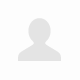
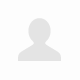

In [19]:
page_source

In [ ]:

html = BeautifulSoup(raw, "html.parser")

In [13]:
# 크롤링
for p in range(20):
    # 5초 delay
    time.sleep(2)
    
    js_script = "document.querySelector(\"body > app > layout > div > div.container > div.router-output > "\
                "shrinkable-layout > search-layout > search-list > search-list-contents > perfect-scrollbar\").innerHTML"
    raw = driver.execute_script("return " + js_script)

    html = BeautifulSoup(raw, "html.parser")

    contents = html.select("div > div.ps-content > div > div > div .item_search")
    for s in contents:
        search_box_html = s.select_one(".search_box")

        name = search_box_html.select_one(".title_box .search_title .search_title_text").text
        print("식당명: " + name)
        try:
            phone = search_box_html.select_one(".search_text_box .phone").text
        except:
            phone = "NULL"
        print("전화번호: " + phone)
        address = search_box_html.select_one(".ng-star-inserted .address").text
        print("주소: " + address)

        print("--"*30)
    # 다음 페이지로 이동
    try:
        next_btn = driver.find_element_by_css_selector("button.btn_next")
        next_btn.click()
    except:
        print("데이터 수집 완료")
        break


JavascriptException: Message: javascript error: Cannot read properties of null (reading 'innerHTML')
  (Session info: chrome=113.0.5672.126)
Stacktrace:
#0 0x55b587fa8e43 <unknown>
#1 0x55b587ce0908 <unknown>
#2 0x55b587ce5663 <unknown>
#3 0x55b587ce7624 <unknown>
#4 0x55b587d5d37d <unknown>
#5 0x55b587d449b2 <unknown>
#6 0x55b587d5c62a <unknown>
#7 0x55b587d44773 <unknown>
#8 0x55b587d116de <unknown>
#9 0x55b587d12a72 <unknown>
#10 0x55b587f797d2 <unknown>
#11 0x55b587f7bf7b <unknown>
#12 0x55b587f7b9f6 <unknown>
#13 0x55b587f7c6f5 <unknown>
#14 0x55b587f8247b <unknown>
#15 0x55b587f7caa6 <unknown>
#16 0x55b587f5a074 <unknown>
#17 0x55b587f95b75 <unknown>
#18 0x55b587f95d1e <unknown>
#19 0x55b587fa356f <unknown>
#20 0x7efc0a253ea7 start_thread


In [ ]:

# 크롭 웹페이지를 닫음
driver.close()